In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

import os
import torch
import torch.optim as optim
import torch.nn as nn
import random
import torchvision.utils as vutils
import matplotlib.pyplot as plt
import numpy as np

seed = 1 # random.randint(1, 10000)
random.seed(seed)
torch.manual_seed(seed)
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [3]:
import model
NZ = 128  # Size of z latent vector (i.e. size of generator input)
NGF = 64  # Size of generator feature maps
netG = model.Generator(NZ, NGF).to(device)

In [6]:
noise = torch.randn(9, NZ, 1, 1, device=device)

In [5]:
checkpoint = torch.load("4000_save.pt")
netG.load_state_dict(checkpoint['netG'])

<All keys matched successfully>

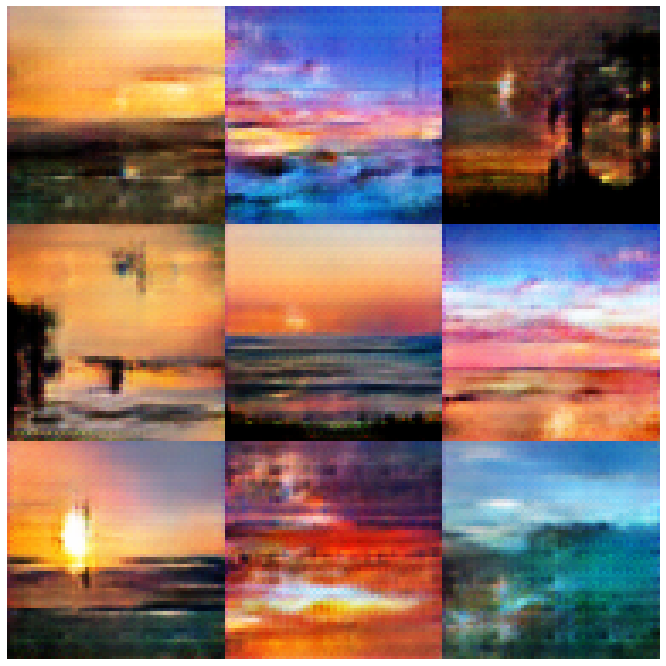

In [10]:
with torch.no_grad():
    fake = netG(noise).detach().cpu()
    vutils.save_image(fake, "sample.png", nrow=int(np.sqrt(fake.shape[0])),
                        normalize=True, scale_each=True, padding=0)
    img = vutils.make_grid(fake, padding=0, normalize=True, scale_each=True, nrow=int(np.sqrt(fake.shape[0])))

    plt.figure(figsize=(12,12))
    plt.axis("off")
    plt.imshow(np.transpose(img,(1,2,0)))

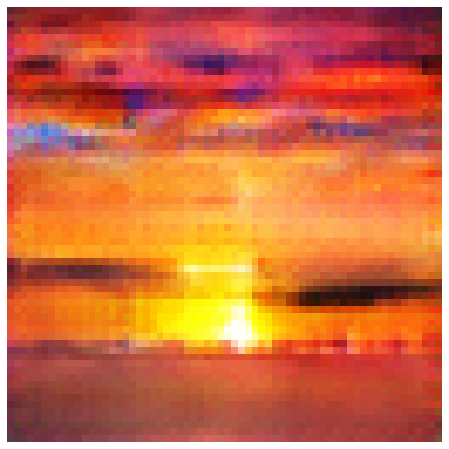

In [29]:
plt.figure(figsize=(8,8))
plt.axis("off")
img = vutils.make_grid(fake[35], padding=2, normalize=True)
plt.imshow(np.transpose(img,(1,2,0)))